#  RT-Dicomの読み込み・編集・保存

- **1. RTPlanの読み込み**
    - **1.1 pydicomモジュールのインポート**
    - **1.2 RTPlanのインポート**
    - **1.3 RTPlanの表示**
<br><br>
- **2 RTPlan編集の練習**
    - **2.1 Patient IDの取得**
    - **2.2 Manufacturerの取得（演習）**
    - **2.3 Study Descriptionの取得（演習）**
    - **2.4 Fraction Group Sequenceの取得**
    - **2.5 Number of Fractions Plannedの取得**
    - **2.6 1門目のBeam情報取得**
    - **2.7 Control point の取得**
    - **2.8 MLC位置情報の取得（演習）**
<br><br>
- **3 pythonの基本ルールとnumpyについて**
    - **3.1 データ型の確認（Leaf position）**
    - **3.2 for 文(繰り返し)**
    - **3.3 numpy(行列演算)**
<br><br>
- **4 RTPlan(3DCRT)の編集と保存**
    - **4.1 MLCの編集と保存**
    - **4.2 編集前後のBEV表示**
<br><br>
- **付録 RTPlan(VMAT)の編集と保存**
    - **5.1 if 文 (条件分岐) について**
    - **5.2 ifとfor 文の組み合わせ**
    - **5.3 VMATプランのインポートMLCの編集と保存 (VMAT)**
    - **5.4 MLCの編集と保存 (VMAT)編集前後のBEV表示**
    - **5.5 編集前後のBEV表示**

## ●1. RTPlanの読み込み

### 〇1.1 pydicomモジュールのインポート

In [23]:
!pip install pydicom
import pydicom
print("O.K")

O.K


### 〇1.2 RTPlanのインポート

In [30]:
import os
from google.colab import drive

#デフォルトの位置は"/content"。その下にdriveをマウントすると、GoogleDriveにアクセスできる
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/HIPRAC_Python')

print(os.getcwd())

print(os.listdir())

plan = pydicom.dcmread('3DCRT.dcm')
print("O.K")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/HIPRAC_Python
['VMAT.dcm', 'DICOM.txt', '3DCRT.dcm', 'RTdicom_Exercise.ipynb']
O.K


### 〇1.3 RTPlanの表示

In [33]:
print(plan)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 190
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Plan Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.246.352.71.5.635124024244.94376.20190607135536
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.43077212.6
(0002, 0013) Implementation Version Name         SH: 'DicomEdit 1.9.9'
-------------------------------------------------
(0008, 0012) Instance Creation Date              DA: '20190615'
(0008, 0013) Instance Creation Time              TM: '135616.211000'
(0008, 0016) SOP Class UID                       UI: RT Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.71.5.635124024244.94376.20190607135536
(0008, 0020) Study Date                          DA: '20190615'
(0008, 00

## ●2. RTPlan編集の練習

### 〇2.1 Patient IDの取得

In [32]:
print(plan.PatientID)

11111111


### 〇2.2 Manufacturerの取得

In [34]:
print()

Varian Medical Systems


### 〇2.3 Study Descriptionの取得

In [ ]:
print()

### 〇2.4 Fraction Group Sequenceの表示

In [36]:
print(plan.FractionGroupSequence[0])

(300a, 0071) Fraction Group Number               IS: "1"
(300a, 0078) Number of Fractions Planned         IS: "10"
(300a, 0080) Number of Beams                     IS: "2"
(300a, 00a0) Number of Brachy Application Setups IS: "0"
(300c, 0004)  Referenced Beam Sequence   2 item(s) ---- 
   (300a, 0084) Beam Dose                           DS: "1.5"
   (300a, 0086) Beam Meterset                       DS: "179.882953893399"
   (300c, 0006) Referenced Beam Number              IS: "1"
   (3249, 0010) Private Creator                     LO: 'Varian Medical Systems VISION 3249'
   (3249, 1010) Private tag data                    UN: Array of 52 elements
   ---------
   (300a, 0084) Beam Dose                           DS: "1.5"
   (300a, 0086) Beam Meterset                       DS: "180.255630310527"
   (300c, 0006) Referenced Beam Number              IS: "2"
   (3249, 0010) Private Creator                     LO: 'Varian Medical Systems VISION 3249'
   (3249, 1010) Private tag data            

### 〇2.5 Number of Fractions Planned の取得

In [35]:
print(plan.FractionGroupSequence[0].NumberOfFractionsPlanned)

10


### 〇2.6 1門目のBeam情報表示

In [ ]:
print(plan.BeamSequence[0]) #1門目のビーム情報

### 〇2.7 Control point の取得

In [37]:
cp0 = plan.BeamSequence[0].ControlPointSequence[0] # 最初のビームの、最初のコントロールポイント
print(cp0)

(300a, 0112) Control Point Index                 IS: "0"
(300a, 0114) Nominal Beam Energy                 DS: "6.0"
(300a, 0115) Dose Rate Set                       DS: "600.0"
(300a, 011a)  Beam Limiting Device Position Sequence   3 item(s) ---- 
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'ASYMX'
   (300a, 011c) Leaf/Jaw Positions                  DS: [-98, 82]
   ---------
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'ASYMY'
   (300a, 011c) Leaf/Jaw Positions                  DS: [-81, 72]
   ---------
   (300a, 00b8) RT Beam Limiting Device Type        CS: 'MLCX'
   (300a, 011c) Leaf/Jaw Positions                  DS: Array of 120 elements
   ---------
(300a, 011e) Gantry Angle                        DS: "90.0"
(300a, 011f) Gantry Rotation Direction           CS: 'NONE'
(300a, 0120) Beam Limiting Device Angle          DS: "0.0"
(300a, 0121) Beam Limiting Device Rotation Direc CS: 'NONE'
(300a, 0122) Patient Support Angle               DS: "0.0"
(300a, 0123) P

### 〇2.8 MLC位置情報の取得

## ●3. pythonの基本ルールとNumpyについて

### 〇3.1 データの型を調べよう(leaf position)

In [38]:
MLC =  ['-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '25.3', '-4.0e-1', '-8.95', '-12.15', '-14.45', '-17.25', '-41', '-50.7', '-55.24', '-58.25', '-68.8', '-76.3', '-80.8', '-86.65', '-92.65', '-94.38', '-96.2', '-96.74', '-96.54', '-95', '-92.95', '-92.13', '-89.45', '-86.75', '-81.6', '-76.6', '-71.4', '-65.4', '-58.2', '-49.4', '-35.4', '-21.4', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '36.8', '46', '54.6', '59.75', '62.75', '65.85', '67.6', '67.51', '70.2', '74.95', '77.95', '80.65', '82.4', '82.36', '82.32', '81.8', '80.03', '78.15', '75.65', '73.67', '72.07', '69.85', '67.55', '65.2', '63.33', '60.75', '56.95', '53.2', '47.6', '40.4', '29.2', '-1.6', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17', '-7.17']
type(MLC)

list

### 〇3.2 for 文 (繰り返し) について

In [39]:
for i in range (10):
    print(i)

0
1
2
3
4
5
6
7
8
9


### 〇3.3 Numpy (行列演算) について

In [40]:
#Numpyを使わないで実行します
storages = [1,2,3,4,5,6,7,8,9]
new_storages = []

for i in storages:
    i += 1 
    new_storages.append(i)
print(new_storages)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [41]:
#Numpyを使って実行します
import numpy as np
storages = np.array([1,2,3,4,5,6,7,8,9])
storages += 1
print(storages)
type(storages)

[ 2  3  4  5  6  7  8  9 10]


numpy.ndarray

## ●4. RTPlan(MLC)の編集と保存

### 〇4.1 MLCの編集と保存 (3DCRT)

In [42]:
import pydicom
import numpy as np

plan = pydicom.dcmread("3DCRT.dcm")

Beam = plan.FractionGroupSequence[0].NumberOfBeams
shift = 30

for i in range(Beam):
   
    leaf = plan.BeamSequence[i].ControlPointSequence[0].BeamLimitingDevicePositionSequence[2].LeafJawPositions
    leaf_mod = np.array(leaf)+shift
    plan.BeamSequence[i].ControlPointSequence[0].BeamLimitingDevicePositionSequence[2].LeafJawPositions = leaf_mod.tolist()
   
plan.save_as("3DCRT_MLCmod.dcm")  

print("O.K")

O.K


### 〇4.2 Beams eye viewの表示(参考)

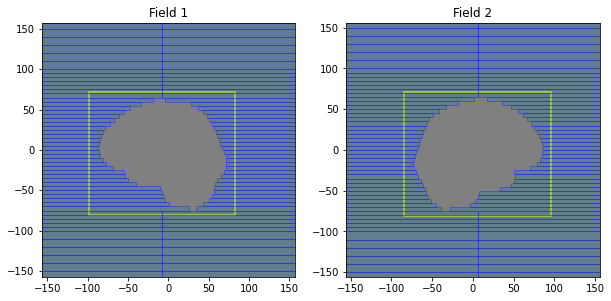

In [43]:
#編集前プランのBEV表示

import pydicom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plan = pydicom.dcmread('3DCRT.dcm')

def make_bev(beam, ax):

    num_of_leaves = beam.BeamLimitingDeviceSequence[2].NumberOfLeafJawPairs 

    cp0 = beam.ControlPointSequence[0] 

    jaw_x = cp0.BeamLimitingDevicePositionSequence[0].LeafJawPositions 
    jaw_y = cp0.BeamLimitingDevicePositionSequence[1].LeafJawPositions 
    leaf_position = cp0.BeamLimitingDevicePositionSequence[2].LeafJawPositions 

    boundaries = np.array(beam.BeamLimitingDeviceSequence[2].LeafPositionBoundaries) 
    leaf_widths = np.diff(boundaries)

    leaf_length = 200 

    angle = float(cp0.BeamLimitingDeviceAngle)
    angle_rad = np.radians(angle)
    a_sin = np.sin(angle_rad)
    a_cos = np.cos(angle_rad)
    
    x_0 = jaw_x[0]*a_cos - jaw_y[0]*a_sin
    y_0 = jaw_x[0]*a_sin + jaw_y[0]*a_cos
    ax.add_patch(plt.Rectangle(
        xy=(x_0, y_0),
        width=jaw_x[1]-jaw_x[0],
        height=jaw_y[1]-jaw_y[0],
        fill=False, ec='yellow', angle=angle, lw=1.5))
        
    for i in range(num_of_leaves):
        x_1 = (leaf_position[i]-leaf_length)*a_cos - boundaries[i]*a_sin
        y_1 = (leaf_position[i]-leaf_length)*a_sin + boundaries[i]*a_cos
        ax.add_patch(plt.Rectangle(
            xy=(x_1, y_1),
            width=leaf_length,
            height=leaf_widths[i],
            fill=True, ec='blue', angle=angle, lw=1., alpha=0.3))
                                       
        x_2 = leaf_position[i+num_of_leaves]*a_cos - boundaries[i]*a_sin
        y_2 = leaf_position[i+num_of_leaves]*a_sin + boundaries[i]*a_cos
        ax.add_patch(plt.Rectangle(
            xy=(x_2, y_2),
            width=leaf_length,
            height=leaf_widths[i],
            fill=True, ec='blue', angle=angle, lw=1., alpha=0.3))

    ax.patch.set_facecolor('gray')

    disp = max([np.sqrt(i**2 + j**2) for i in jaw_x for j in jaw_y])
    margin = 30
    disp += margin
    ax.set_xlim([-disp, disp])
    ax.set_ylim([-disp, disp])
    ax.set_aspect('equal')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) 
make_bev(plan.BeamSequence[0], ax1) 
ax1.set_title(plan.BeamSequence[0].BeamName) 
ax2 = fig.add_subplot(1,2,2) 
make_bev(plan.BeamSequence[1], ax2)
ax2.set_title(plan.BeamSequence[1].BeamName)

plt.savefig('3DCRT.jpg')

plt.show()


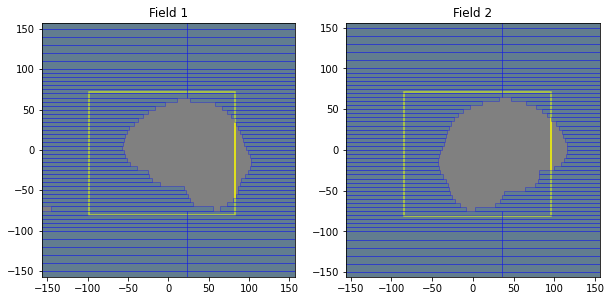

In [44]:
#編集後プランのBEV表示

plan = pydicom.dcmread('3DCRT_MLCmod.dcm')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) 
make_bev(plan.BeamSequence[0], ax1) 
ax1.set_title(plan.BeamSequence[0].BeamName) 
ax2 = fig.add_subplot(1,2,2) 
make_bev(plan.BeamSequence[1], ax2)
ax2.set_title(plan.BeamSequence[1].BeamName)

plt.savefig('3DCRT_MLCmod.jpg')

plt.show()

In [ ]:
以下は付録です、余力のある方はどうぞ

### 〇5.1 if 文 (条件分岐) について

In [45]:
age = 26
if age >= 20:
    print("あなたは成人です")
else:
    print("あなたは未成年です")

あなたは成人です


### 〇5.2 ifとfor 文の組み合わせ

### 〇5.3 VMATプランのインポート

In [46]:
plan = pydicom.dcmread("VMAT.dcm")
print(plan)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 164
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: RT Plan Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.246.352.71.5.635124024244.51794.20171109082122
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.7
-------------------------------------------------
(0008, 0012) Instance Creation Date              DA: '20171109'
(0008, 0013) Instance Creation Time              TM: '082436.793000'
(0008, 0016) SOP Class UID                       UI: RT Plan Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.246.352.71.5.635124024244.51794.20171109082122
(0008, 0020) Study Date                          DA: '20080227'
(0008, 0030) Study Time                          TM: '152844'
(0008, 0050) Accessi

### 〇5.4 VMATプランのMLC編集

In [50]:
import pydicom
import numpy as np

plan = pydicom.dcmread("VMAT.dcm")
Beam = plan.FractionGroupSequence[0].NumberOfBeams
CP = plan.BeamSequence[0].NumberOfControlPoints
error = 30

for i in range(Beam):
    
    for j in range(CP):
        
        if plan.BeamSequence[i].ControlPointSequence[j].ControlPointIndex == 0:
            Beam_CP = plan.BeamSequence[i].ControlPointSequence[j].BeamLimitingDevicePositionSequence[2].LeafJawPositions
            leaf_mod = np.array(Beam_CP)+error
            plan.BeamSequence[i].ControlPointSequence[j].BeamLimitingDevicePositionSequence[2].LeafJawPositions = leaf_mod.tolist()

        else:
            Beam_CP = plan.BeamSequence[i].ControlPointSequence[j].BeamLimitingDevicePositionSequence[0].LeafJawPositions
            leaf_mod = np.array(Beam_CP)+error
            plan.BeamSequence[i].ControlPointSequence[j].BeamLimitingDevicePositionSequence[0].LeafJawPositions = leaf_mod.tolist()

plan.save_as("VMAT_MLCmod.dcm")
print("O.K")

O.K


### 〇5.5 VMATプランのBEV表示

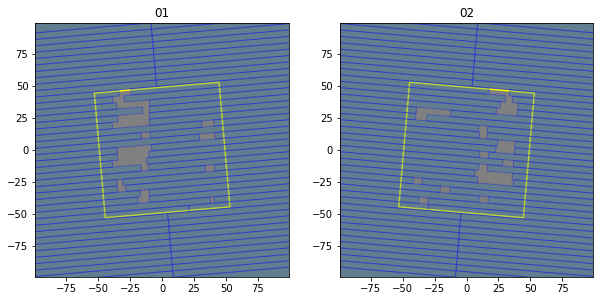

In [51]:
#MLC編集前のBEV表示
plan = pydicom.dcmread('VMAT.dcm')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) 
make_bev(plan.BeamSequence[0], ax1) 
ax1.set_title(plan.BeamSequence[0].BeamName) 
ax2 = fig.add_subplot(1,2,2) 
make_bev(plan.BeamSequence[1], ax2)
ax2.set_title(plan.BeamSequence[1].BeamName)

plt.savefig('VMAT.jpg')

plt.show()

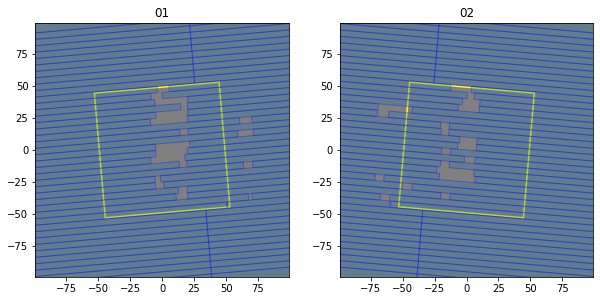

In [52]:
#MLC編集後のBEV表示
plan = pydicom.dcmread('VMAT_MLCmod.dcm')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) 
make_bev(plan.BeamSequence[0], ax1) 
ax1.set_title(plan.BeamSequence[0].BeamName) 
ax2 = fig.add_subplot(1,2,2) 
make_bev(plan.BeamSequence[1], ax2)
ax2.set_title(plan.BeamSequence[1].BeamName)

plt.savefig('VMAT_MLCmod.jpg')

plt.show()